# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [1]:
# Details Student 1:
#Ariel Reshef 327213906 
#aryelpanda@gmail.com



## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# --------------------------------------
# imports:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer

### Your implementation:
Write your code solution in the following code-cells

In [11]:
# Function to find the best alpha value for Multinomial Naive Bayes
def find_best_alpha(X_train, y_train, cv=10):
    alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
    param_grid = {'alpha': alphas}

    model = MultinomialNB()

    # Use GridSearchCV to find the best alpha value
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='f1_macro')
    grid_search.fit(X_train, y_train)

    return grid_search.best_params_, grid_search.best_score_

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Find the best alpha value using the function
best_params, best_score = find_best_alpha(X_train, y_train)

# Print the best alpha value and the corresponding best F1 score
print("Best alpha value:", best_params['alpha'])
print("Best F1 score:", best_score)

# Find the second best and third best alpha values and their corresponding F1 scores
alphas = [alpha for alpha in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000] if alpha != best_params['alpha']]

for alpha in alphas:
    model = MultinomialNB(alpha=alpha)
    model.fit(X_train, y_train)
    f1_score_val = f1_score(y_val, model.predict(X_val), average='macro')
    print(f"Alpha: {alpha}, F1 Score: {f1_score_val}")


Best alpha value: 0.1
Best F1 score: 0.5804759006804121


MultinomialNB(alpha=1e-05)

Alpha: 1e-05, F1 Score: 0.4769607843137255


MultinomialNB(alpha=0.0001)

Alpha: 0.0001, F1 Score: 0.4769607843137255


MultinomialNB(alpha=0.001)

Alpha: 0.001, F1 Score: 0.4769607843137255


MultinomialNB(alpha=0.01)

Alpha: 0.01, F1 Score: 0.6148380355276907


MultinomialNB(alpha=1)

Alpha: 1, F1 Score: 0.4769607843137255


MultinomialNB(alpha=10)

Alpha: 10, F1 Score: 0.4327485380116959


MultinomialNB(alpha=100)

Alpha: 100, F1 Score: 0.4327485380116959


MultinomialNB(alpha=1000)

Alpha: 1000, F1 Score: 0.4327485380116959


MultinomialNB(alpha=10000)

Alpha: 10000, F1 Score: 0.4327485380116959


MultinomialNB(alpha=100000)

Alpha: 100000, F1 Score: 0.4327485380116959


In [12]:
#Load the datasets
train_filename = 'C:\\Users\\aryel\\annotated_corpus_for_train.csv'
test_filename = 'C:\\Users\\aryel\\corpus_for_test.csv'

df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [13]:


# Text Preprocessing
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
    
    # Tokenization
    tokens = text.split()
    
    # Remove stopwords using sklearn's ENGLISH_STOP_WORDS
    tokens = [word for word in tokens if word.lower() not in ENGLISH_STOP_WORDS]
    
    
    return ' '.join(tokens)  # Return without stemming

# Apply text preprocessing to the "story" column in both train and test DataFrames
df_train['story'] = df_train['story'].apply(preprocess_text)
df_test['story'] = df_test['story'].apply(preprocess_text)


In [14]:

# Build feature vectors for the training data
vectorizer = CountVectorizer(lowercase=True)
X_train = vectorizer.fit_transform(df_train["story"])
y_train = df_train["gender"]

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Naive Bayes model and train it on the new training set
alpha_value = 0.1
nb_model = MultinomialNB(alpha=alpha_value)
nb_model.fit(X_train, y_train)

# Build feature vectors for the test set
X_test = vectorizer.transform(df_test["story"])

# Make predictions on the test set using Naive Bayes
nb_test_predictions = nb_model.predict(X_test)

# Calculate F1 score for the validation set with Naive Bayes
f1_scores_val_nb = f1_score(y_val, nb_model.predict(X_val), average=None)
f1_male_val_nb = f1_scores_val_nb[0]
f1_female_val_nb = f1_scores_val_nb[1]

# Calculate average F1 score for the validation set with Naive Bayes
average_f1_val_nb = (f1_male_val_nb + f1_female_val_nb) / 2

# Cross-validation function, 10 folds
def custom_cross_val(classifier, X, y, cv=10):
    f1_scores = cross_val_score(classifier, X, y, cv=cv, scoring='f1_macro')
    return f1_scores

# Calculate F1 scores using cross-validation for Naive Bayes
cv_f1_scores_nb = custom_cross_val(nb_model, X_train, y_train, cv=10)
average_cv_f1_nb = cv_f1_scores_nb.mean()

# Calculate F1 score for the training set with Naive Bayes
f1_scores_train_nb = f1_score(y_train, nb_model.predict(X_train), average=None)
f1_male_train_nb = f1_scores_train_nb[0]
f1_female_train_nb = f1_scores_train_nb[1]

# Calculate average F1 score for the training set with Naive Bayes
average_f1_train_nb = (f1_male_train_nb + f1_female_train_nb) / 2
#------------------------------------------------------------------------

# K-nearest neighbors model and train it on the new training set
k =4 
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions on the test set using K-nearest neighbors
knn_test_predictions = knn_model.predict(X_test)

# Calculate F1 score for the validation set with K-nearest neighbors
f1_scores_val_knn = f1_score(y_val, knn_model.predict(X_val), average=None)
f1_male_val_knn = f1_scores_val_knn[0]
f1_female_val_knn = f1_scores_val_knn[1]

# Calculate average F1 score for the validation set with K-nearest neighbors
average_f1_val_knn = (f1_male_val_knn + f1_female_val_knn) / 2

# Calculate F1 scores using cross-validation for K-nearest neighbors
cv_f1_scores_knn = custom_cross_val(knn_model, X_train, y_train, cv=10)
average_cv_f1_knn = cv_f1_scores_knn.mean()

# Calculate F1 score for the training set with K-nearest neighbors
f1_scores_train_knn = f1_score(y_train, knn_model.predict(X_train), average=None)
f1_male_train_knn = f1_scores_train_knn[0]
f1_female_train_knn = f1_scores_train_knn[1]

# Calculate average F1 score for the training set with K-nearest neighbors
average_f1_train_knn = (f1_male_train_knn + f1_female_train_knn) / 2

# Print the results for Naive Bayes
print("Results for Naive Bayes:")
print("F1 Score (Validation):", average_f1_val_nb)
print("Average F1 Score (Cross-Validation):", average_cv_f1_nb)
print("F1 Score (Training):", average_f1_train_nb)

# Print the results for K-nearest neighbors
print("\nResults for K-Nearest Neighbors:")
print("F1 Score (Validation):", average_f1_val_knn)
print("Average F1 Score (Cross-Validation):", average_cv_f1_knn)
print("F1 Score (Training):", average_f1_train_knn)



MultinomialNB(alpha=0.1)

KNeighborsClassifier(n_neighbors=4)

Results for Naive Bayes:
F1 Score (Validation): 0.6715888278388278
Average F1 Score (Cross-Validation): 0.632895099837586
F1 Score (Training): 0.9976903273826652

Results for K-Nearest Neighbors:
F1 Score (Validation): 0.49180093089867527
Average F1 Score (Cross-Validation): 0.5710455608531197
F1 Score (Training): 0.7733385791462016


In [15]:
#Results for the validation set for Naive Bayes
print("F1 score for Male class (Validation set):", f1_male_val_nb)
print("F1 score for Female class (Validation set):", f1_female_val_nb)
print("Average F1 score (Validation set):", average_f1_train_nb)

# Print the results for the training set for Naive Bayes
print("\nF1 score for Male class (Training set):", f1_male_train_nb)
print("F1 score for Female class (Training set):", f1_female_train_nb)
print("Average F1 score (Training set):", average_f1_train_nb)

#Results for cross-validation for Naive Bayes
print("\nCross-Validation F1 scores:", cv_f1_scores_nb)
print("Average Cross-Validation F1 score:", average_cv_f1_nb)



F1 score for Male class (Validation set): 0.5128205128205128
F1 score for Female class (Validation set): 0.8303571428571429
Average F1 score (Validation set): 0.9976903273826652

F1 score for Male class (Training set): 0.9964664310954063
F1 score for Female class (Training set): 0.998914223669924
Average F1 score (Training set): 0.9976903273826652

Cross-Validation F1 scores: [0.67553191 0.71889401 0.63064295 0.63541667 0.58074534 0.6875
 0.59378734 0.45632476 0.55473098 0.79537704]
Average Cross-Validation F1 score: 0.632895099837586


In [16]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

Text(0.5, 0, 'Models')

([<matplotlib.axis.XTick at 0x240f6c9c820>,
 [Text(0.3, 0, 'Naive Bayes'), Text(1.3, 0, 'K-Nearest Neighbors')])

Text(0, 0.5, 'F1 Score')

Text(0.5, 1.0, 'F1 Scores for Naive Bayes and K-Nearest Neighbors')

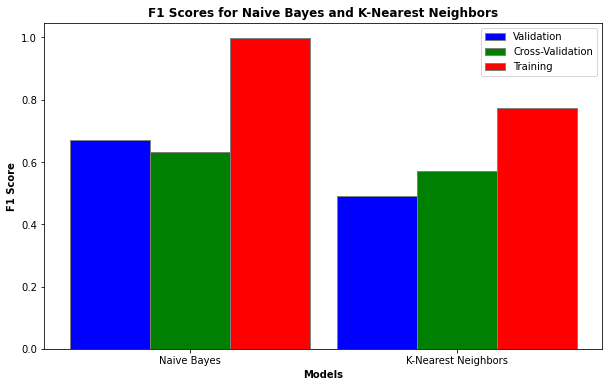

In [17]:

import matplotlib.pyplot as plt

# Data
models = ['Naive Bayes', 'K-Nearest Neighbors']
validation_scores = [average_f1_val_nb, average_f1_val_knn]
cross_validation_scores = [average_cv_f1_nb, average_cv_f1_knn]
training_scores = [average_f1_train_nb, average_f1_train_knn]

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Set width of bar
bar_width = 0.3

# Set positions of bars on x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot the data
plt.bar(r1, validation_scores, color='b', width=bar_width, edgecolor='grey', label='Validation')
plt.bar(r2, cross_validation_scores, color='g', width=bar_width, edgecolor='grey', label='Cross-Validation')
plt.bar(r3, training_scores, color='r', width=bar_width, edgecolor='grey', label='Training')

# Add labels, title, and legend
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.ylabel('F1 Score', fontweight='bold')
plt.title('F1 Scores for Naive Bayes and K-Nearest Neighbors', fontweight='bold')
plt.legend()

# Show the plot
plt.show()


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

def test_k_values(X_train, y_train, X_val, y_val, k_values):

    f1_scores_val = []
    f1_scores_cv = []

    for k in k_values:
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train, y_train)

        # Make predictions on the validation set
        knn_val_predictions = knn_model.predict(X_val)

        # Calculate F1 score for the validation set
        f1_score_val = f1_score(y_val, knn_val_predictions, average=None)
        average_f1_val = (f1_score_val[0] + f1_score_val[1]) / 2
        f1_scores_val.append(average_f1_val)

        # Calculate F1 scores using cross-validation
        cv_f1_scores = custom_cross_val(knn_model, X_train, y_train, cv=10)
        average_cv_f1 = cv_f1_scores.mean()
        f1_scores_cv.append(average_cv_f1)

    # Find the best k value based on validation F1 scores
    best_k_index = f1_scores_val.index(max(f1_scores_val))
    best_k = k_values[best_k_index]
    best_f1_val = f1_scores_val[best_k_index]
    best_f1_cv = f1_scores_cv[best_k_index]

    # Print the best values
    print(f"Best K Value: k = {best_k}")
    print(f"Best Validation F1 Score: {best_f1_val}")
    print(f"Cross-Validation F1 Score for Best K: {best_f1_cv}")

    return f1_scores_val, f1_scores_cv, best_k, best_f1_val, best_f1_cv

#test:
k_values_to_test = [3,4,5, 7, 9,10,100]
f1_scores_val, f1_scores_cv, best_k, best_f1_val, best_f1_cv = test_k_values(X_train, y_train, X_val, y_val, k_values_to_test)


Best K Value: k = 4
Best Validation F1 Score: 0.49180093089867527
Cross-Validation F1 Score for Best K: 0.5710455608531197
